In [24]:
from __future__ import print_function

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
from ipywidgets import fixed, interact, interact_manual, interactive
from natsort import index_natsorted
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from dna_features_viewer import BiopythonTranslator, CircularGraphicRecord
import seaborn as sns


%load_ext line_profiler
%matplotlib inline
pyo.init_notebook_mode(connected=True)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [2]:
df = pd.read_csv("../../data/3_analysis-resistance/all_rgiout_2022-12-01", sep="\t")
df = df.sort_values(
    by=["Accession_Number"],
    ascending=True,
    key=lambda x: np.argsort(index_natsorted(df["Accession_Number"])),
    ignore_index=True,
)
df[["Species", "Subspecies"]] = df["Strain"].str.split("subsp.", 1, expand=True)
df = df.replace(np.nan, "Null", regex=True)

rgiintegron = pd.read_csv(
    "../../data/3_analysis-resistance/rgi_subset_integronoverlap",
    sep="\t",
    names=df.columns.values,
)
rgiintegron["Species"] = rgiintegron["Strain"].str.split("subsp.", 1, expand=True)
rgiintegron["Subspecies"] = "Null"
contigdf = pd.concat(
    [
        df["Accession_Number"],
        df["Contig"].str.split("_", expand=True)[0].str.split("|").str[-1],
    ],
    axis=1,
).copy()

ecoli_mlplasmid_out = pd.read_csv(
    "../../data/3_analysis-plasmid/merged-Escherichia_coli-mlplasmidout", sep="\t"
)
ecoli_mlplasmid_out["Contig"] = ecoli_mlplasmid_out["Contig_name"].str.split(
    " ", expand=True
)[0]
ecoliplasmids_df = contigdf.loc[
    contigdf["Accession_Number"].isin(ecoli_mlplasmid_out["AccNum"])
]
ecoliplasmids_df = ecoliplasmids_df.loc[
    ecoliplasmids_df[0].isin(ecoli_mlplasmid_out["Contig"])
]
ecoliplasmids_df = df.loc[ecoliplasmids_df.index].copy()

## NCTC 74 

/tmp/ipykernel_10620/370571749.py:102: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6



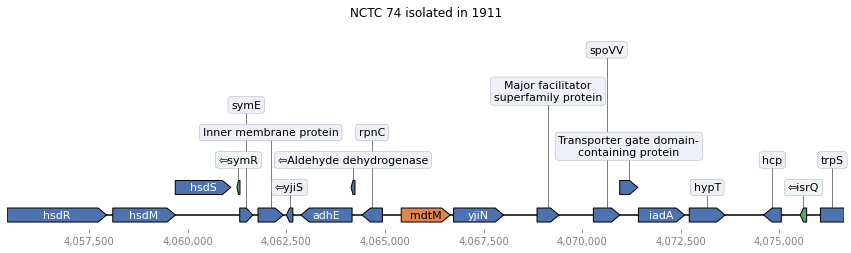

In [53]:
class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        if "gene" in feature.qualifiers:
            if (
                "acrB_1" in feature.qualifiers["gene"][0]
                or "ddlA" in feature.qualifiers["gene"][0]
                or "mdtM" in feature.qualifiers["gene"][0]
            ):
                return sns.color_palette('deep')[1]
        if "product" in feature.qualifiers:
            if "Aminoglycoside" in feature.qualifiers["product"][0]:
                return sns.color_palette('deep')[1]
        if feature.type == "CDS":
            return sns.color_palette('deep')[0]
        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        if feature.type == "restriction_site":
            return None
        if "gene" in feature.qualifiers:
            if "acrB_1" in feature.qualifiers["gene"][0]:
                return "acrD"
            if "ddlA" in feature.qualifiers["gene"][0]:
                return "vanG"
            if "_" in feature.qualifiers["gene"][0]:
                return feature.qualifiers["gene"][0].split("_")[0]
        # else:
        #     prodName = feature.qualifiers["product"][0]
        #     # print(prodName)
        #     if "Aminoglycoside" in feature.qualifiers["product"][0]:
        #         return "AAC(6')-Iaa"
        #     if "thylakoid" in feature.qualifiers["product"][0]:
        #         return "btpA"
        #     if "VI_effect_Hcp1:" in feature.qualifiers["product"][0]:
        #         return "type VI secretion system effector, Hcp1 family"
        #     if "NCBIFAM" in prodName or "NCBI Protein Cluster" in prodName:
        #         # print(prodName)
        #         try:
        #             NewprodName = prodName.split(": ")[1]
        #             return NewprodName
        #         except:
        #             return prodName
            # print(feature.qualifiers)
        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/home/ak586/baym/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC74/assembly/assembly_bakta/assembly_bakta.gbff",
        "genbank",
    )
)
# print(record_dict)
record = record_dict["contig_1"]
graphic_record = MyCustomTranslator().translate_record(record)

# cgraphic_record = graphic_record.crop((2347219 - 5000, 2347656 + 5000))
# ax, _ = cgraphic_record.plot(
#     figure_width=15, with_ruler=True, strand_in_label_threshold=7
# )
# plt.title("NCTC 74 isolated in 1911")
# ax.figure.savefig("NCTC74-AAC-neigh.png", bbox_inches="tight", dpi=200)

# 1414715
# cgraphic_record = graphic_record.crop((1414715 - 10000, 1417828 + 10000))
# ax, _ = cgraphic_record.plot(
#     figure_width=15, with_ruler=True, strand_in_label_threshold=7
# )
# plt.title("NCTC 74 isolated in 1911")
# ax.figure.savefig("NCTC74-acrD-neigh.png", bbox_inches="tight", dpi=200)


# 3578193
# cgraphic_record = graphic_record.crop((3578193 - 20000, 3579305 + 20000))
# ax, _ = cgraphic_record.plot(
#     figure_width=15, with_ruler=True, strand_in_label_threshold=7
# )
# plt.title("NCTC 74 isolated in 1911")
# ax.figure.savefig("NCTC74-vanG-neigh.png", bbox_inches="tight", dpi=200)

# 4065413
cgraphic_record = graphic_record.crop((4065413 - 10000, 4066654 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 74 isolated in 1911")
ax.figure.savefig("./figs/suppfig-boxgenecontext/NCTC74-mdtM-neigh.svg", bbox_inches="tight", dpi=300, figsize=(7, 2))

## NCTC 418

{'contig_1': SeqRecord(seq=Seq('ATGTGGATCCGCCCATTGCAGGCGGAACTGAGCGATAACACGCTGGCACTGTAT...AGC'), id='contig_1', name='contig_1', description='chromosome contig_1, whole genome shotgun sequence', dbxrefs=[])}


/tmp/ipykernel_10620/2445344790.py:119: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6



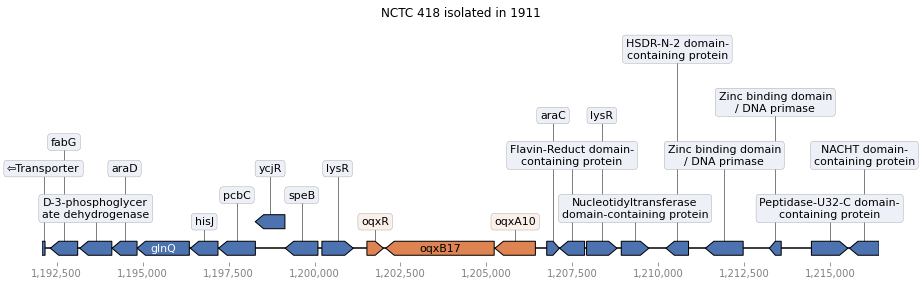

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from dna_features_viewer import BiopythonTranslator


class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        pmrF_op = {
            "arnB": "pmrH",
            "arnC": "pmrF",
            "arnA": "pmrI",
            "arnD": "pmrJ",
            "arnT": "pmrK",
            "arnE": "pmrL",
            "arnF": "pmrM",
        }
        oqx_op = {"bepE_1": "oqxB", "bepF": "oqxA"}
        if "gene" in feature.qualifiers:
            if (
                feature.qualifiers["gene"][0] in pmrF_op
                or feature.qualifiers["gene"][0] in oqx_op
                or "crcB" in feature.qualifiers["gene"][0]
                or "mdt" in feature.qualifiers["gene"][0]
                or "mdfA" in feature.qualifiers["gene"][0]
                or "acr" in feature.qualifiers["gene"][0]
                or "ddlA" in feature.qualifiers["gene"][0]
            ) or ("oqx" in feature.qualifiers['gene'][0]):
                return sns.color_palette('deep')[1]
        if feature.type == "CDS":
            return sns.color_palette('deep')[0]
        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        pmrF_op = {
            "arnB": "pmrH",
            "arnC": "pmrF",
            "arnA": "pmrI",
            "arnD": "pmrJ",
            "arnT": "pmrK",
            "arnE": "pmrL",
            "arnF": "pmrM",
        }
        oqx_op = {"bepE_1": "oqxB", "bepF": "oqxA"}
        if feature.type == "restriction_site":
            return None
        if "gene" in feature.qualifiers:
            if feature.qualifiers["gene"][0] in pmrF_op:
                return pmrF_op[feature.qualifiers["gene"][0]]
            if feature.qualifiers["gene"][0] in oqx_op:
                return oqx_op[feature.qualifiers["gene"][0]]
            if feature.qualifiers["gene"][0] == "ddlA":
                return "vanG"
            if "_" in feature.qualifiers["gene"][0]:
                return feature.qualifiers["gene"][0].split("_")[0]
        # else:
        #     prodName = feature.qualifiers["product"][0]
        #     # print(prodName)
        #     if "NCBIFAM" in prodName or "NCBI Protein Cluster" in prodName:
        #         NewprodName = prodName.split(": ")[1]
        #         # if 'metalloregulator' in NewprodName:
        #         #     return 'Metalloregulator ArsR/SmtB TF'
        #         return NewprodName

            # print(feature.qualifiers)
        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/n/data1/hms/dbmi/baym/arya/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC418/assembly_1/assembly_1_bakta/assembly_1_bakta.gbff",
        "genbank",
    )
)
print(record_dict)
# sub_record = record_dict['UGNE01000001.1'][1405899:1417399]
record = record_dict["contig_1"]
# 1410370..1411185
# 299166.0 	300149.0
graphic_record = MyCustomTranslator().translate_record(record)
# cgraphic_record = graphic_record.crop((299166 - 10000, 300149 + 10000))
# ax, _ = cgraphic_record.plot(
#     figure_width=15, with_ruler=True, strand_in_label_threshold=7
# )
# plt.title("NCTC 418 isolated in 1911")
# ax.figure.savefig("./figs/fig3/NCTC418-pmrF-neigh.png", bbox_inches="tight", dpi=200)

# 844285.0 	844698.0
# emrKY operon MDR pump controlled by evgAS signaling protein
# also upstream of crcB?? gene
# cgraphic_record = graphic_record.crop((844285 - 10000, 844698 + 10000))
# ax, _ = cgraphic_record.plot(
#     figure_width=15, with_ruler=True, strand_in_label_threshold=7
# )


# 1202075.0 	1205227.0
# oqx
cgraphic_record = graphic_record.crop((1202075 - 10000, 1206426 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 418 isolated in 1911")
ax.figure.savefig("./figs/suppfig-boxgenecontext/NCTC418-oqx-neigh.svg", bbox_inches="tight", figsize=(7, 2), dpi=300)

## NCTC 4136

{'contig_1': SeqRecord(seq=Seq('TGGCTTTAGGTATATTATCAAAATTGGCAATGGCAGGTATTGTTTTAACTAGCG...ATA'), id='contig_1', name='contig_1', description='contig_1, whole genome shotgun sequence', dbxrefs=[]), 'contig_2': SeqRecord(seq=Seq('ATGTCGGAAAAAGAAATTTGGGAAAAAGTGCTTGAAATTGCTCAAGAAAAATTA...TTT'), id='contig_2', name='contig_2', description='contig_2, whole genome shotgun sequence', dbxrefs=[])}


/tmp/ipykernel_10620/1832962438.py:77: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6



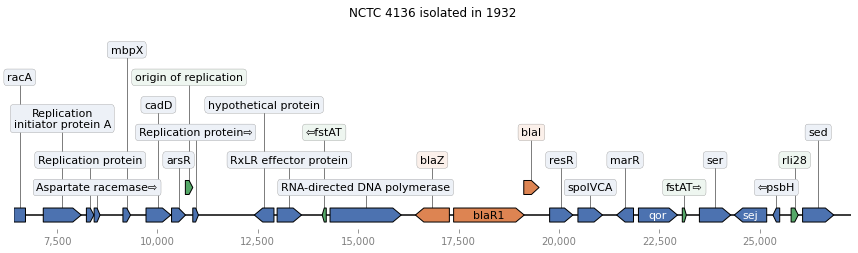

In [31]:
class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        if "gene" in feature.qualifiers:
            if (
                "bla" in feature.qualifiers["gene"][0]
                or "ddlA" in feature.qualifiers["gene"][0]
                or "mdtM" in feature.qualifiers["gene"][0]
            ):
                return sns.color_palette('deep')[1]
        if "product" in feature.qualifiers:
            if "Aminoglycoside" in feature.qualifiers["product"][0]:
                return sns.color_palette('deep')[1]
        if feature.type == "CDS":
            return sns.color_palette('deep')[0]
        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        # if feature.type == "restriction_site":
        #     return None
        # if "gene" in feature.qualifiers:
        #     if "acrB_1" in feature.qualifiers["gene"][0]:
        #         return "acrD"
        #     if "ddlA" in feature.qualifiers["gene"][0]:
        #         return "vanG"
        #     if "_" in feature.qualifiers["gene"][0]:
        #         return feature.qualifiers["gene"][0].split("_")[0]
        # else:
        #     prodName = feature.qualifiers["product"][0]
        #     # print(prodName)
        #     if "Aminoglycoside" in feature.qualifiers["product"][0]:
        #         return "AAC(6')-Iaa"
        #     if "thylakoid" in feature.qualifiers["product"][0]:
        #         return "btpA"
        #     if "VI_effect_Hcp1:" in feature.qualifiers["product"][0]:
        #         return "type VI secretion system effector, Hcp1 family"
        #     if "NCBIFAM" in prodName or "NCBI Protein Cluster" in prodName:
        #         # print(prodName)
        #         try:
        #             NewprodName = prodName.split(": ")[1]
        #             return NewprodName
        #         except:
        #             return prodName
            # print(feature.qualifiers)
        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/home/ak586/baym/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC4136/assembly/assembly_bakta/assembly_bakta.gbff",
        "genbank",
    )
)
print(record_dict)
record = record_dict["contig_1"]
graphic_record = MyCustomTranslator().translate_record(record)

cgraphic_record = graphic_record.crop((16427 - 10000, 17272 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 4136 isolated in 1932")
ax.figure.savefig("./figs/suppfig-boxgenecontext/NCTC4136-blaGenes-neigh.svg", bbox_inches="tight", dpi=300, figsize=(7, 2))

{'contig_1': SeqRecord(seq=Seq('TGGCTTTAGGTATATTATCAAAATTGGCAATGGCAGGTATTGTTTTAACTAGCG...ATA'), id='contig_1', name='contig_1', description='contig_1, whole genome shotgun sequence', dbxrefs=[]), 'contig_2': SeqRecord(seq=Seq('ATGTCGGAAAAAGAAATTTGGGAAAAAGTGCTTGAAATTGCTCAAGAAAAATTA...TTT'), id='contig_2', name='contig_2', description='contig_2, whole genome shotgun sequence', dbxrefs=[])}


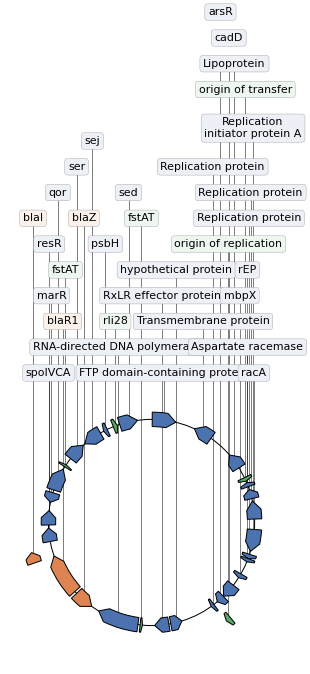

In [32]:
record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/home/ak586/baym/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC4136/assembly/assembly_bakta/assembly_bakta.gbff",
        "genbank",
    )
)
print(record_dict)
record = record_dict["contig_1"]
graphic_record = MyCustomTranslator().translate_record(record, record_class=CircularGraphicRecord)
ax, _ = graphic_record.plot(figure_width=8, figure_height=11)

## NCTC 9127

### Sul2 Neighborhood

/tmp/ipykernel_10620/4240263037.py:76: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6



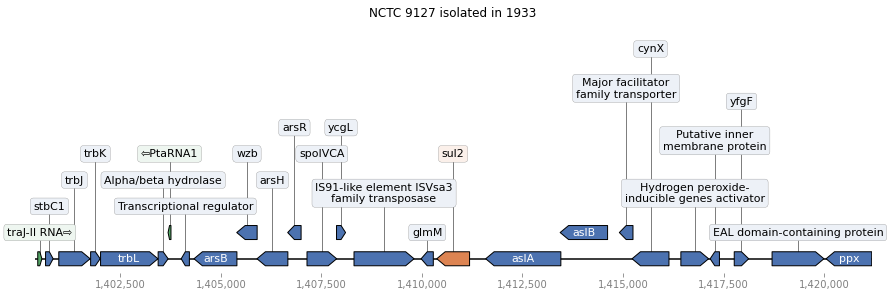

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from dna_features_viewer import BiopythonTranslator
import seaborn as sns

class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        if "gene" in feature.qualifiers and feature.qualifiers["gene"] == ["sul2"]:
            return sns.color_palette('deep')[1]

        if feature.type == "CDS":
            return sns.color_palette('deep')[0]

        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        if feature.type == "restriction_site":
            return None
        if "gene" in feature.qualifiers:
            if feature.qualifiers["gene"] == ["manB"]:
                return "glmM"
            elif feature.qualifiers["gene"] == ["bin3"]:
                return "Putative Tn552 DNA-invertase"
            elif feature.qualifiers["gene"] == ["folP_2"]:
                return "sul2"
            elif feature.qualifiers["gene"] == ["arsH_1"]:
                return "arsH"
            elif feature.qualifiers["gene"] == ["chuR_2"]:
                return "chuR"

        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/n/data1/hms/dbmi/baym/arya/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC9127/assembly/assembly_bakta/assembly_bakta.gbff",
        "genbank",
    )
)
# print(record_dict)
# sub_record = record_dict['UGNE01000001.1'][1405899:1417399]
record = record_dict["contig_1"]
# 1410370..1411185
graphic_record = MyCustomTranslator().translate_record(record)
cgraphic_record = graphic_record.crop((1410370 - 10000, 1411185 + 10000))
# cgraphic_record = graphic_record.crop((1307573, 1482690))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 9127 isolated in 1933")
ax.figure.savefig("./figs/suppfig-boxgenecontext/NCTC9127-sul2-neigh.svg", bbox_inches="tight", figsize=(7,2), dpi=300)

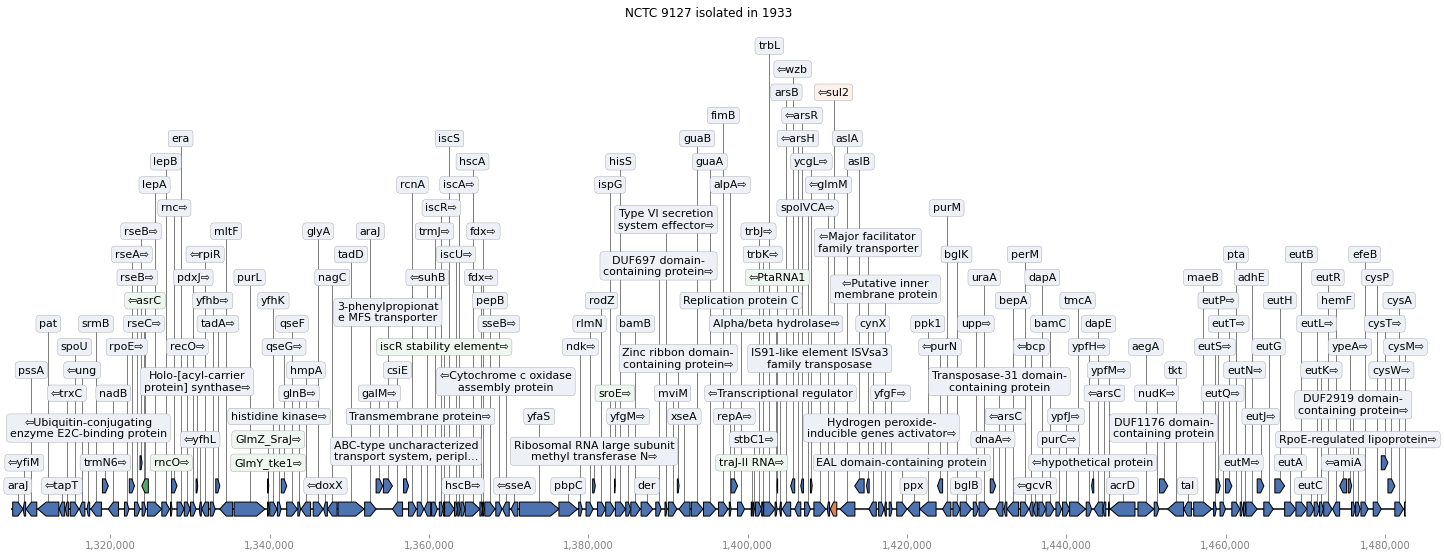

In [46]:
graphic_record = MyCustomTranslator().translate_record(record)
# cgraphic_record = graphic_record.crop((1410370 - 20000, 1411185 + 20000))
cgraphic_record = graphic_record.crop((1307573, 1482690))
ax, _ = cgraphic_record.plot(
    figure_width=25, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 9127 isolated in 1933")
ax.figure.savefig("./figs/suppfig-boxgenecontext/NCTC9127-sul2-ICE.svg", bbox_inches="tight", dpi=200)

## NCTC 8603

{'contig_1': SeqRecord(seq=Seq('CATTCATTAAATGTTCAATTTCTGCTTTGGCTGCTGTATTGTTCGTTTCTACTA...CCT'), id='contig_1', name='contig_1', description='contig_1, whole genome shotgun sequence', dbxrefs=[]), 'contig_2': SeqRecord(seq=Seq('CGGTAATTGATATCACTAACGAAGCAACGCTGCCGAAGCGTGCAACCATCACTT...CGA'), id='contig_2', name='contig_2', description='contig_2, whole genome shotgun sequence', dbxrefs=[]), 'contig_3': SeqRecord(seq=Seq('TCGCCCGGCATCCACACCACGTCCGTCATCCCAGCCACGAATAAATTCACCGCG...CGT'), id='contig_3', name='contig_3', description='contig_3, whole genome shotgun sequence', dbxrefs=[])}


/tmp/ipykernel_10620/4146560200.py:67: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6



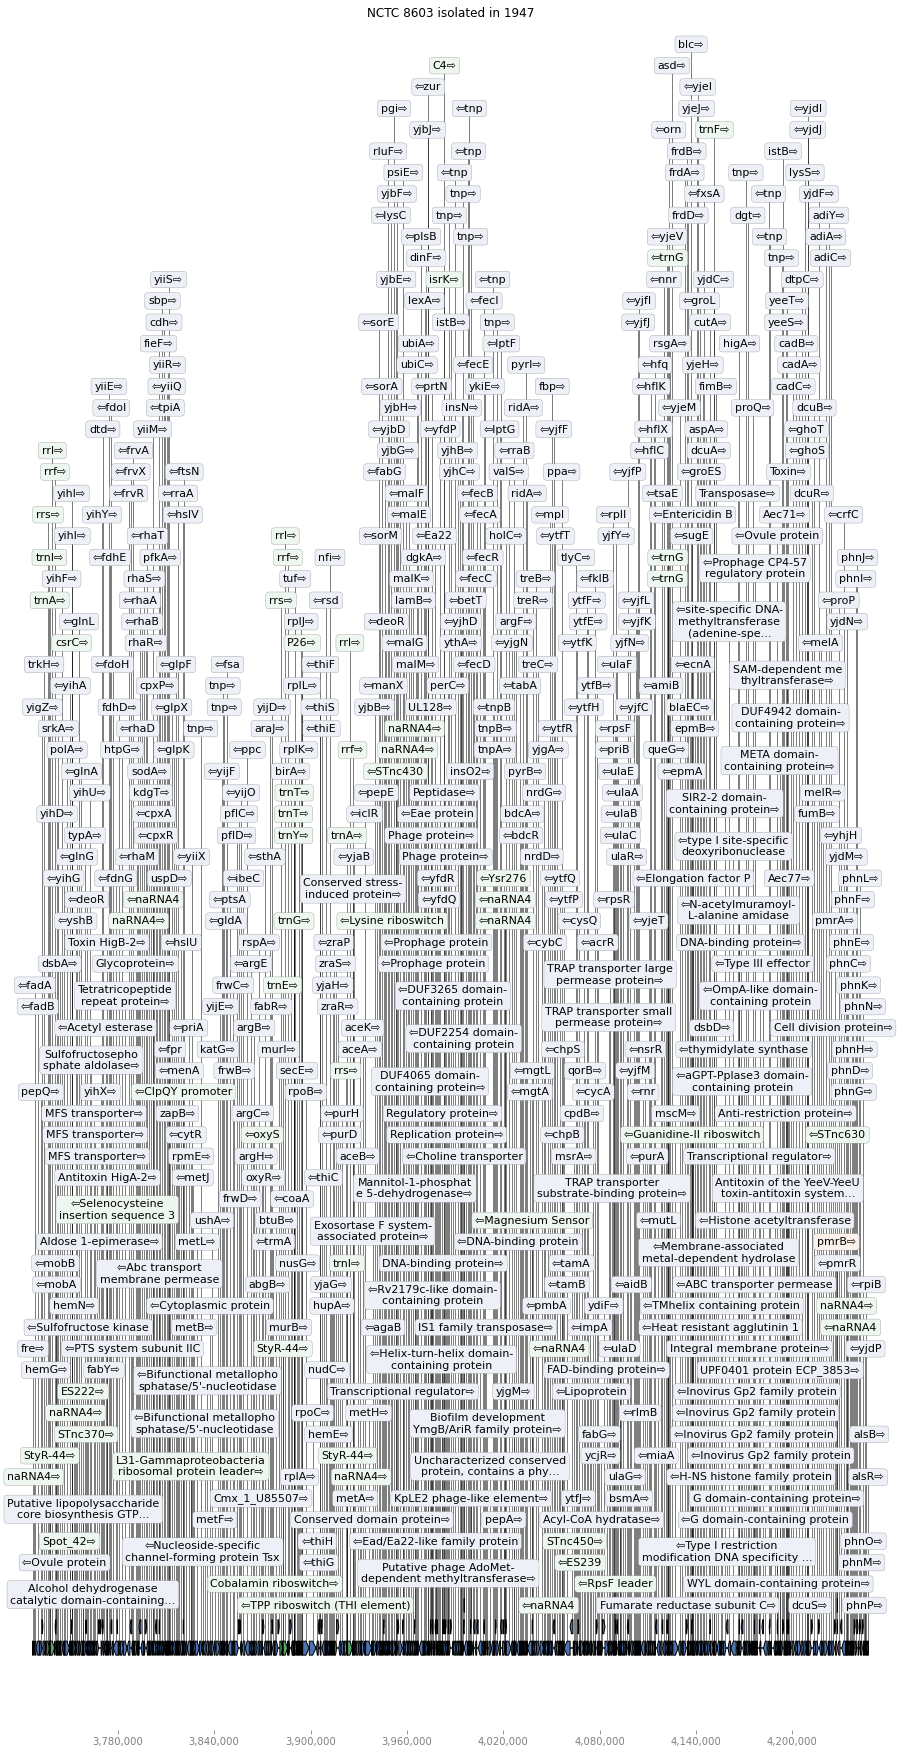

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from dna_features_viewer import BiopythonTranslator
import seaborn as sns

class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        if "gene" in feature.qualifiers and feature.qualifiers["gene"] == ["pmrB"]:
            return sns.color_palette('deep')[1]

        if feature.type == "CDS":
            return sns.color_palette('deep')[0]

        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        if feature.type == "restriction_site":
            return None
        if "gene" in feature.qualifiers:
            if feature.qualifiers["gene"] == ["manB"]:
                return "glmM"
            elif feature.qualifiers["gene"] == ["bin3"]:
                return "Putative Tn552 DNA-invertase"
            elif feature.qualifiers["gene"] == ["folP_2"]:
                return "sul2"
            elif feature.qualifiers["gene"] == ["arsH_1"]:
                return "arsH"
            elif feature.qualifiers["gene"] == ["chuR_2"]:
                return "chuR"

        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/n/data1/hms/dbmi/baym/arya/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC8603/assembly/assembly_bakta/assembly_bakta.gbff",
        "genbank",
    )
)
print(record_dict)
# sub_record = record_dict['UGNE01000001.1'][1405899:1417399]
record = record_dict["contig_3"]
# 1410370..1411185
graphic_record = MyCustomTranslator().translate_record(record)
cgraphic_record = graphic_record.crop((4226864 - 500000, 4227952 + 20000))
# cgraphic_record = graphic_record.crop((1307573, 1482690))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 8603 isolated in 1947")
ax.figure.savefig("./figs/suppfig-boxgenecontext/NCTC8603-pmrB-neigh.svg", bbox_inches="tight", figsize=(7,2), dpi=300)

## NCTC 7422

/tmp/ipykernel_10620/3370646528.py:67: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6



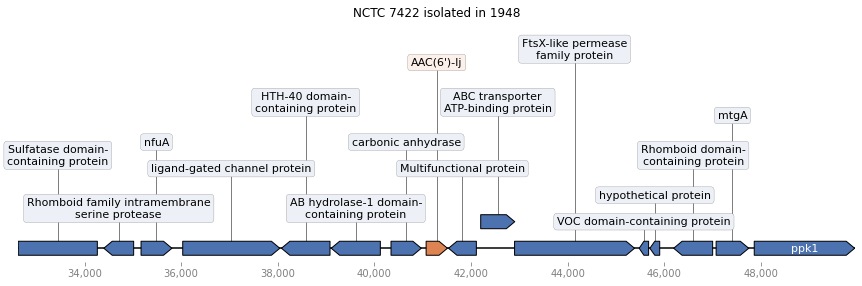

In [82]:
class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        if "gene" in feature.qualifiers:
            if "aac" in feature.qualifiers["gene"][0]:
                return sns.color_palette('deep')[1]
        if feature.type == "CDS":
            return sns.color_palette('deep')[0]
        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        if feature.type == "restriction_site":
            return None
        if "gene" in feature.qualifiers:
            if "aac" in feature.qualifiers["gene"][0]:
                return "AAC(6')-Ij"
            if "_" in feature.qualifiers["gene"][0]:
                return feature.qualifiers["gene"][0].split("_")[0]
        # else:
        #     prodName = feature.qualifiers["product"][0]
        #     # print(prodName)
        #     if "cmlA" in feature.qualifiers["product"][0]:
        #         return "catII"
        #     if "thylakoid" in feature.qualifiers["product"][0]:
        #         return "btpA"
        #     if "NCBIFAM" in prodName or "NCBI Protein Cluster" in prodName:
        #         # print(prodName)
        #         try:
        #             NewprodName = prodName.split(": ")[1]
        #             return NewprodName
        #         except:
        #             return prodName
            # print(feature.qualifiers)
        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/home/ak586/baym/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC7422/assembly/assembly_bakta/assembly_bakta.gbff",
        "genbank",
    )
)
# print(record_dict)
record = record_dict["contig_28"]
# 1410370..1411185
# 299166.0 	300149.0
graphic_record = MyCustomTranslator().translate_record(record)
cgraphic_record = graphic_record.crop((41073-8444,41513+8444))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 7422 isolated in 1948")
ax.figure.savefig("./figs/suppfig-boxgenecontext/NCTC7422-AAC6Ij-neigh.svg", bbox_inches="tight", figsize=(7, 2), dpi=300)

## NCTC 232

/tmp/ipykernel_30973/3895839668.py:67: MatplotlibDeprecationWarning:

savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6



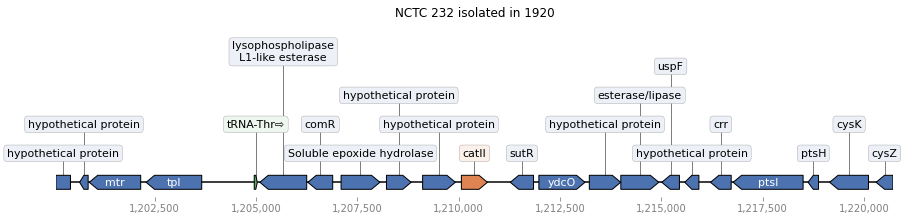

In [17]:
class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        if "gene" in feature.qualifiers:
            if "cmlA" in feature.qualifiers["gene"][0]:
                return sns.color_palette('deep')[1]
        if feature.type == "CDS":
            return sns.color_palette('deep')[0]
        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        if feature.type == "restriction_site":
            return None
        if "gene" in feature.qualifiers:
            if "cmlA" in feature.qualifiers["gene"][0]:
                return "catII"
            if "_" in feature.qualifiers["gene"][0]:
                return feature.qualifiers["gene"][0].split("_")[0]
        else:
            prodName = feature.qualifiers["product"][0]
            # print(prodName)
            if "cmlA" in feature.qualifiers["product"][0]:
                return "catII"
            if "thylakoid" in feature.qualifiers["product"][0]:
                return "btpA"
            if "NCBIFAM" in prodName or "NCBI Protein Cluster" in prodName:
                # print(prodName)
                try:
                    NewprodName = prodName.split(": ")[1]
                    return NewprodName
                except:
                    return prodName
            # print(feature.qualifiers)
        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/home/ak586/baym/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC232/assembly/assembly_prokka/assembly_prokka.gbk",
        "genbank",
    )
)
# print(record_dict)
record = record_dict["UGQG01000001.1"]
# 1410370..1411185
# 299166.0 	300149.0
graphic_record = MyCustomTranslator().translate_record(record)
cgraphic_record = graphic_record.crop((1210069 - 10000, 1210710 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 232 isolated in 1920")
ax.figure.savefig("./figs/fig3/NCTC232-catII-neigh.svg", bbox_inches="tight", figsize=(7, 2), dpi=300)

## old

In [3]:
df.loc[df["Year_Cultured"] < 1935].value_counts(
    ["Accession_Number", "Species", "Year_Cultured"]
)

Accession_Number  Species                         Year_Cultured
NCTC8457          Vibrio cholerae biotype el tor  1930             102
NCTC9433          Pseudomonas aeruginosa          1925              58
NCTC4169          Escherichia coli                1931              56
NCTC4450          Escherichia coli                1932              54
NCTC2966          Shigella dysenteriae            1929              54
                                                                  ... 
NCTC11212         Chryseobacterium balustinum     1929               1
NCTC8182          Streptococcus agalactiae        1932               1
NCTC8183          Streptococcus agalactiae        1932               1
NCTC8185          Streptococcus agalactiae        1932               1
NCTC1937          Comamonas terrigena             1923               1
Length: 194, dtype: int64

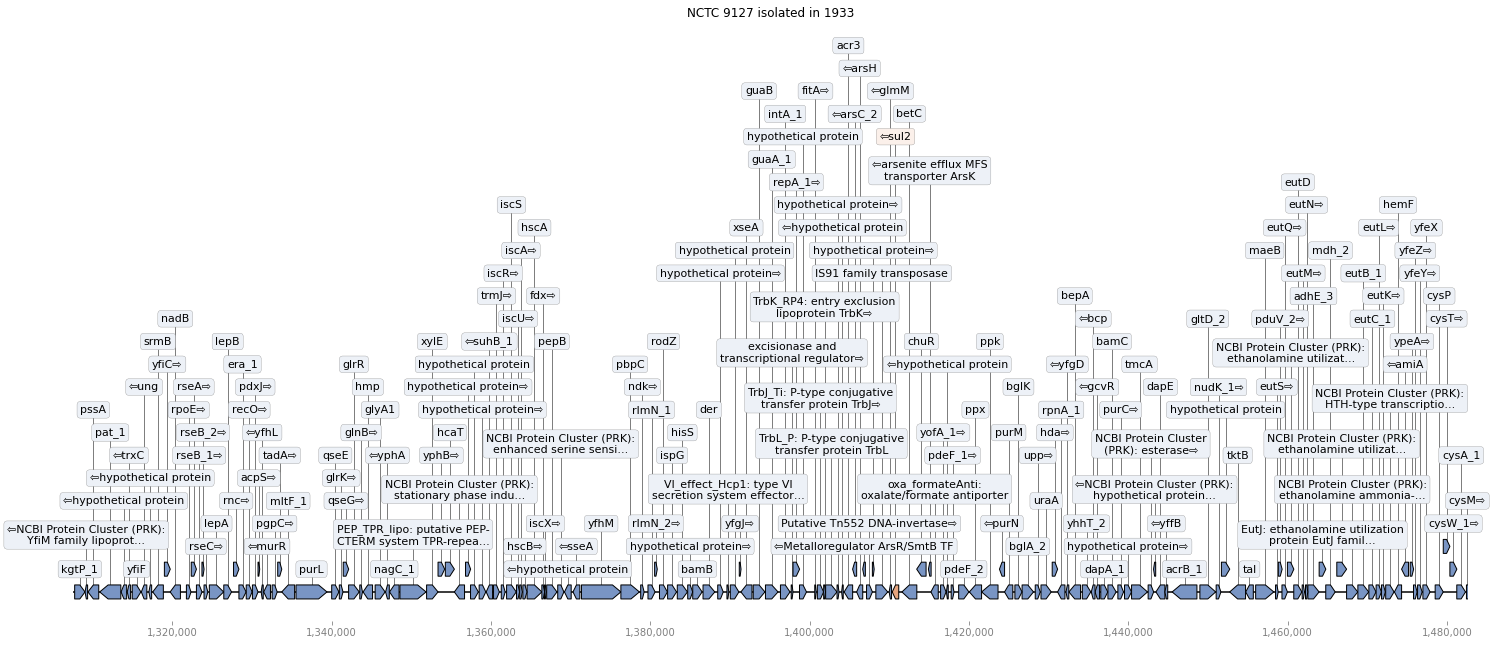

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from dna_features_viewer import BiopythonTranslator
import seaborn as sns

class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        if "gene" in feature.qualifiers and feature.qualifiers["gene"] == ["folP_2"]:
            return "#E6A47D"

        if feature.type == "CDS":
            return sns.color_palette('deep')[0]

        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        if feature.type == "restriction_site":
            return None
        if "gene" in feature.qualifiers:
            if feature.qualifiers["gene"] == ["glmM_2"]:
                return "glmM"
            elif feature.qualifiers["gene"] == ["bin3"]:
                return "Putative Tn552 DNA-invertase"
            elif feature.qualifiers["gene"] == ["folP_2"]:
                return "sul2"
            elif feature.qualifiers["gene"] == ["arsH_1"]:
                return "arsH"
            elif feature.qualifiers["gene"] == ["chuR_2"]:
                return "chuR"
        else:
            prodName = feature.qualifiers["product"][0]
            # print(prodName)
            if "NCBIFAM" in prodName:
                NewprodName = prodName.split(": ")[1]
                if "metalloregulator" in NewprodName:
                    return "Metalloregulator ArsR/SmtB TF"
                return NewprodName

            # print(feature.qualifiers)
        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/n/data1/hms/dbmi/baym/arya/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC9127/assembly/assembly_prokka/assembly_prokka.gbk",
        "genbank",
    )
)
# sub_record = record_dict['UGNE01000001.1'][1405899:1417399]
record = record_dict["UGNE01000001.1"]
# 1410370..1411185
graphic_record = MyCustomTranslator().translate_record(record)
# cgraphic_record = graphic_record.crop((1410370 - 30000, 1411185 + 30000))
cgraphic_record = graphic_record.crop((1307573, 1482690))
ax, _ = cgraphic_record.plot(
    figure_width=25, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 9127 isolated in 1933")
ax.figure.savefig("./figs/fig3/NCTC9127-sul2-neigh.png", bbox_inches="tight", dpi=200)

/home/ak586/.conda/envs/RESIST/lib/python3.8/site-packages/Bio/GenBank/__init__.py:1380: BiopythonParserWarning:

Expected sequence length 15306679, found 5306679 (ENA_LR134213_LR134213).



{'ENA_LR134213_LR134213': SeqRecord(seq=Seq('ATGTGGATCCGCCCATTGCAGGCGGAACTGAGCGATAACACGCTGGCACTGTAT...AGC'), id='ENA_LR134213_LR134213', name='ENA_LR134213_LR134213', description='Genus species strain strain', dbxrefs=[])}


Text(0.5, 1.0, 'NCTC 418 putative ICE')

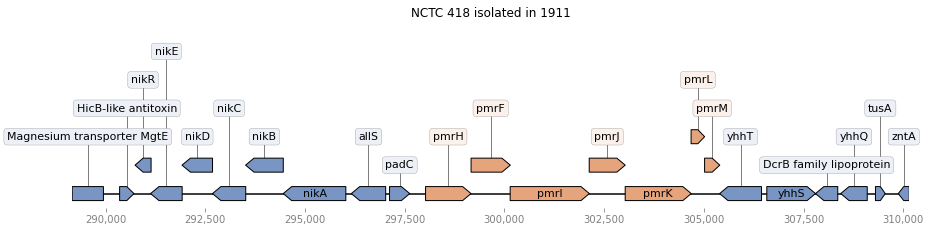

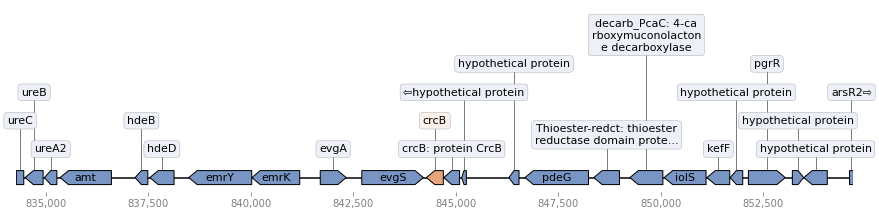

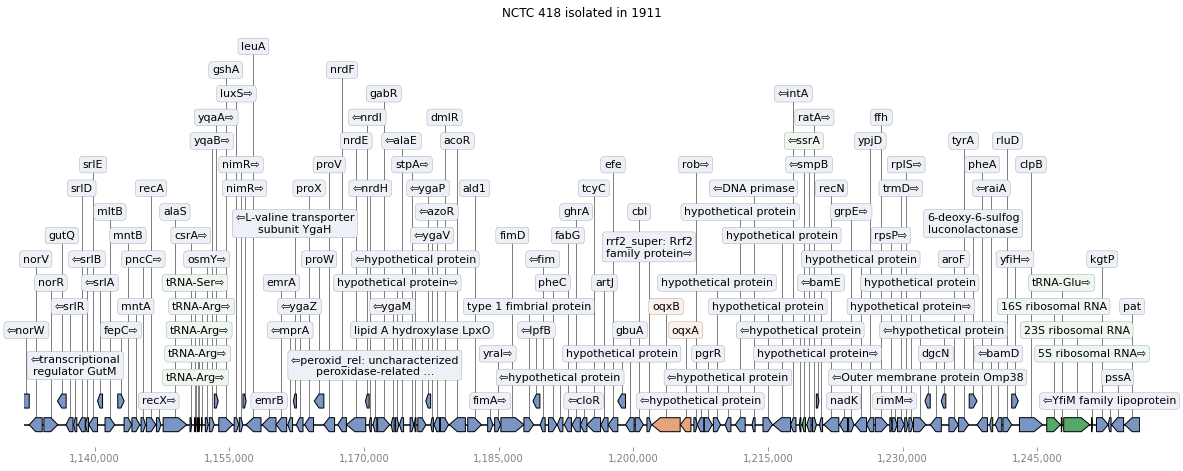

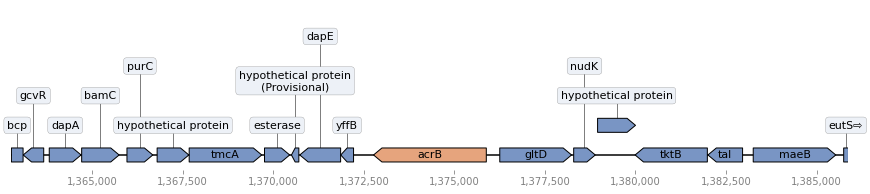

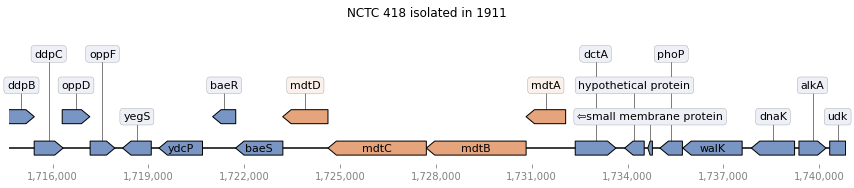

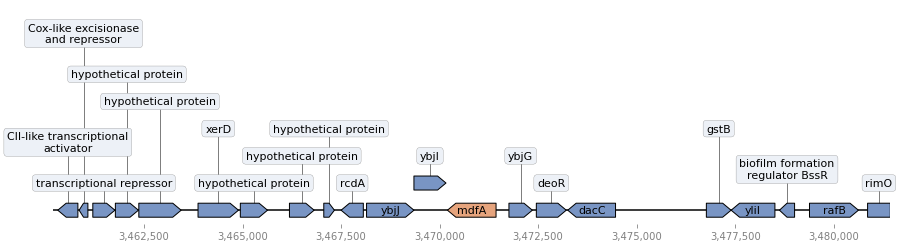

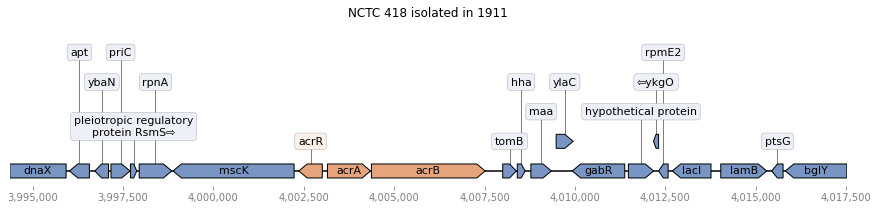

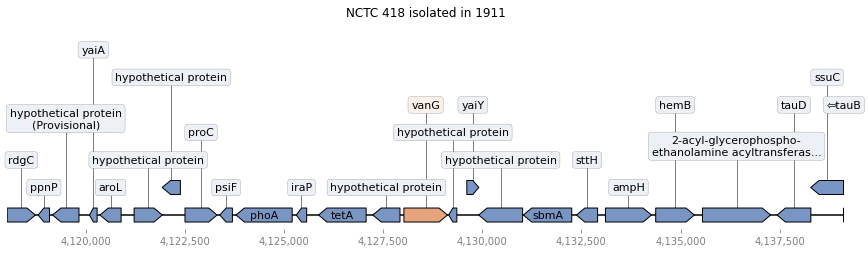

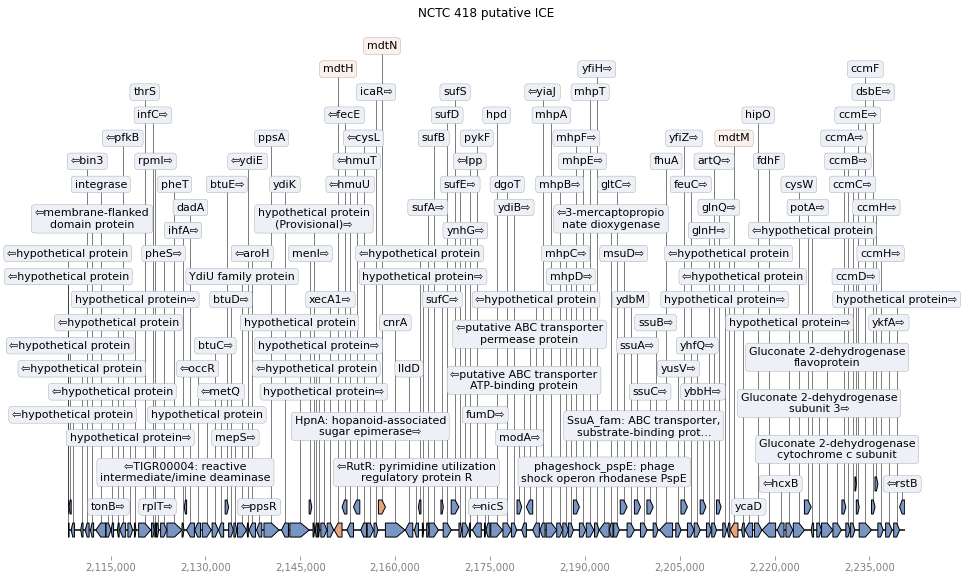

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO
from dna_features_viewer import BiopythonTranslator


class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        pmrF_op = {
            "arnB": "pmrH",
            "arnC": "pmrF",
            "arnA": "pmrI",
            "arnD": "pmrJ",
            "arnT": "pmrK",
            "arnE": "pmrL",
            "arnF": "pmrM",
        }
        oqx_op = {"bepE_1": "oqxB", "bepF": "oqxA"}
        if "gene" in feature.qualifiers:
            if (
                feature.qualifiers["gene"][0] in pmrF_op
                or feature.qualifiers["gene"][0] in oqx_op
                or "crcB" in feature.qualifiers["gene"][0]
                or "mdt" in feature.qualifiers["gene"][0]
                or "mdfA" in feature.qualifiers["gene"][0]
                or "acr" in feature.qualifiers["gene"][0]
                or "ddlA" in feature.qualifiers["gene"][0]
            ):
                return "#E6A47D"
        if feature.type == "CDS":
            return sns.color_palette('deep')[0]
        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        pmrF_op = {
            "arnB": "pmrH",
            "arnC": "pmrF",
            "arnA": "pmrI",
            "arnD": "pmrJ",
            "arnT": "pmrK",
            "arnE": "pmrL",
            "arnF": "pmrM",
        }
        oqx_op = {"bepE_1": "oqxB", "bepF": "oqxA"}
        if feature.type == "restriction_site":
            return None
        if "gene" in feature.qualifiers:
            if feature.qualifiers["gene"][0] in pmrF_op:
                return pmrF_op[feature.qualifiers["gene"][0]]
            if feature.qualifiers["gene"][0] in oqx_op:
                return oqx_op[feature.qualifiers["gene"][0]]
            if feature.qualifiers["gene"][0] == "ddlA":
                return "vanG"
            if "_" in feature.qualifiers["gene"][0]:
                return feature.qualifiers["gene"][0].split("_")[0]
        else:
            prodName = feature.qualifiers["product"][0]
            # print(prodName)
            if "NCBIFAM" in prodName or "NCBI Protein Cluster" in prodName:
                NewprodName = prodName.split(": ")[1]
                # if 'metalloregulator' in NewprodName:
                #     return 'Metalloregulator ArsR/SmtB TF'
                return NewprodName

            # print(feature.qualifiers)
        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/n/data1/hms/dbmi/baym/arya/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC418/assembly_1/assembly_1_prokka/assembly_1_prokka.gbk2",
        "genbank",
    )
)
print(record_dict)
# sub_record = record_dict['UGNE01000001.1'][1405899:1417399]
record = record_dict["ENA_LR134213_LR134213"]
# 1410370..1411185
# 299166.0 	300149.0
graphic_record = MyCustomTranslator().translate_record(record)
cgraphic_record = graphic_record.crop((299166 - 10000, 300149 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 418 isolated in 1911")
# ax.figure.savefig("./figs/fig3/NCTC418-pmrF-neigh.png", bbox_inches="tight", dpi=200)

# 844285.0 	844698.0
# emrKY operon MDR pump controlled by evgAS signaling protein
# also upstream of crcB?? gene
cgraphic_record = graphic_record.crop((844285 - 10000, 844698 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)


# 1202075.0 	1205227.0
# oqx
cgraphic_record = graphic_record.crop((1202075 - 70000, 1206426 + 50000))
ax, _ = cgraphic_record.plot(
    figure_width=20, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 418 isolated in 1911")
ax.figure.savefig("./figs/fig3/NCTC418-oqx-neigh.png", bbox_inches="tight", dpi=200)


# 1372769.0 	1375882.0
# acrD
cgraphic_record = graphic_record.crop((1372769 - 10000, 1375882 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)

# mdtABCD
cgraphic_record = graphic_record.crop((1724625 - 10000, 1730825 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 418 isolated in 1911")
# ax.figure.savefig("NCTC418-mdt-neigh.png", bbox_inches="tight", dpi=200)


# mdfA
cgraphic_record = graphic_record.crop((3470200 - 10000, 3471432 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)

# acrABR op
cgraphic_record = graphic_record.crop((4004370 - 10000, 4007516 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 418 isolated in 1911")
# ax.figure.savefig("NCTC418-acrABR-neigh.png", bbox_inches="tight", dpi=200)


# vanG
cgraphic_record = graphic_record.crop((4128027 - 10000, 4129124 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 418 isolated in 1911")
# ax.figure.savefig("NCTC418-vanG-neigh.png", bbox_inches="tight", dpi=200)


cgraphic_record = graphic_record.crop((2108216, 2240594))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 418 putative ICE")

{'UFRA01000001.1': SeqRecord(seq=Seq('GTGTCACTTTCGCTTTGGCAGCAGTGTCTTGCCCGATTGCAGGATGAGTTACCA...GCC'), id='UFRA01000001.1', name='UFRA01000001.1', description='Genus species strain strain', dbxrefs=[]), 'UFRA01000002.1': SeqRecord(seq=Seq('AACTCCATAAACCTTTGAAAAACCGCCCACCAAGGCGGTTTTTTCGTTCAGCCA...GCC'), id='UFRA01000002.1', name='UFRA01000002.1', description='Genus species strain strain', dbxrefs=[])}


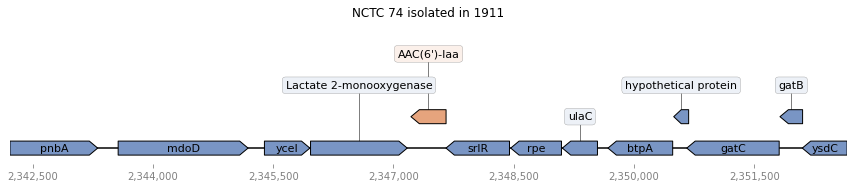

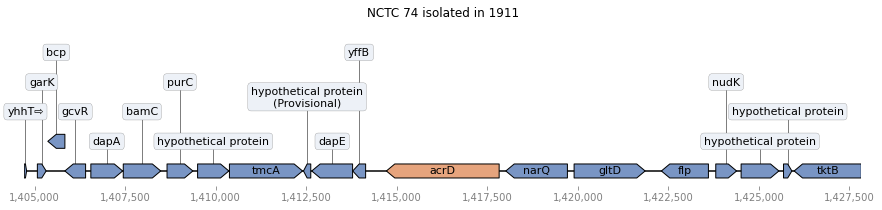

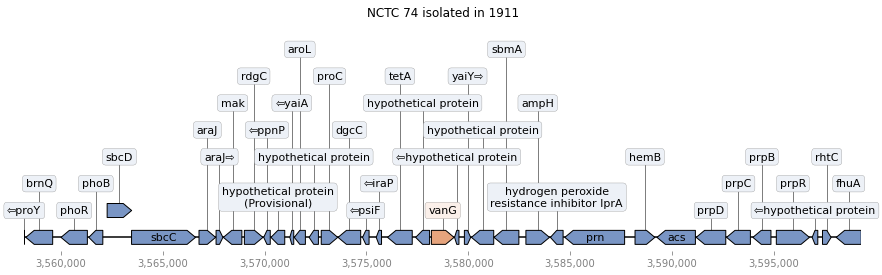

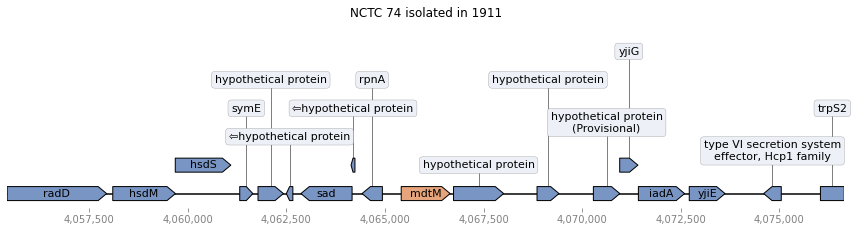

In [6]:
class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        if "gene" in feature.qualifiers:
            if (
                "acrB_1" in feature.qualifiers["gene"][0]
                or "ddlA" in feature.qualifiers["gene"][0]
                or "mdtM" in feature.qualifiers["gene"][0]
            ):
                return "#E6A47D"
        if "product" in feature.qualifiers:
            if "Aminoglycoside" in feature.qualifiers["product"][0]:
                return "#E6A47D"
        if feature.type == "CDS":
            return sns.color_palette('deep')[0]
        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        if feature.type == "restriction_site":
            return None
        if "gene" in feature.qualifiers:
            if "acrB_1" in feature.qualifiers["gene"][0]:
                return "acrD"
            if "ddlA" in feature.qualifiers["gene"][0]:
                return "vanG"
            if "_" in feature.qualifiers["gene"][0]:
                return feature.qualifiers["gene"][0].split("_")[0]
        else:
            prodName = feature.qualifiers["product"][0]
            # print(prodName)
            if "Aminoglycoside" in feature.qualifiers["product"][0]:
                return "AAC(6')-Iaa"
            if "thylakoid" in feature.qualifiers["product"][0]:
                return "btpA"
            if "VI_effect_Hcp1:" in feature.qualifiers["product"][0]:
                return "type VI secretion system effector, Hcp1 family"
            if "NCBIFAM" in prodName or "NCBI Protein Cluster" in prodName:
                # print(prodName)
                try:
                    NewprodName = prodName.split(": ")[1]
                    return NewprodName
                except:
                    return prodName
            # print(feature.qualifiers)
        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/home/ak586/baym/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC74/assembly/assembly_prokka/assembly_prokka.gbk",
        "genbank",
    )
)
print(record_dict)
record = record_dict["UFRA01000001.1"]
graphic_record = MyCustomTranslator().translate_record(record)

cgraphic_record = graphic_record.crop((2347219 - 5000, 2347656 + 5000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 74 isolated in 1911")
# ax.figure.savefig("NCTC74-AAC-neigh.png", bbox_inches="tight", dpi=200)

# 1414715
cgraphic_record = graphic_record.crop((1414715 - 10000, 1417828 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 74 isolated in 1911")
# ax.figure.savefig("NCTC74-acrD-neigh.png", bbox_inches="tight", dpi=200)


# 3578193
cgraphic_record = graphic_record.crop((3578193 - 20000, 3579305 + 20000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 74 isolated in 1911")
# ax.figure.savefig("NCTC74-vanG-neigh.png", bbox_inches="tight", dpi=200)

# 4065413
cgraphic_record = graphic_record.crop((4065413 - 10000, 4066654 + 10000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 74 isolated in 1911")
ax.figure.savefig("./figs/fig3/NCTC74-mdtM-neigh.png", bbox_inches="tight", dpi=200)

In [14]:
x = df.loc[(df['Accession_Number'] == 'NCTC74') & (df['Best_Hit_ARO'] == 'mdtM')]
for i in x:
    print(x[i])

174    NCTC74
Name: Accession_Number, dtype: object
174    Salmonella enterica subsp. enterica serotype T...
Name: Strain, dtype: object
174    1
Name: Assembly_No, dtype: int64
174    1911
Name: Year_Cultured, dtype: int64
174    UFRA01000001.1_4022 # 4065413 # 4066654 # 1 # ...
Name: ORF_ID, dtype: object
174    UFRA01000001.1_4022
Name: Contig, dtype: object
174    4065413.0
Name: Start, dtype: object
174    4066654.0
Name: Stop, dtype: object
174    +
Name: Orientation, dtype: object
174    Strict
Name: Cut_Off, dtype: object
174    700.0
Name: Pass_Bitscore, dtype: object
174    708.753
Name: Best_Hit_Bitscore, dtype: object
174    mdtM
Name: Best_Hit_ARO, dtype: object
174    86.03
Name: Best_Identities, dtype: object
174    3001214.0
Name: ARO, dtype: object
174    protein homolog model
Name: Model_type, dtype: object
174    Null
Name: SNPs_in_Best_Hit_ARO, dtype: object
174    Null
Name: Other_SNPs, dtype: object
174    fluoroquinolone antibiotic; lincosamide antibi...
Name: Dr

{'UGQG01000001.1': SeqRecord(seq=Seq('CTTTGTTGCCAGCGCGTGATGGCGGGAACTCAAAGGAGACTGCCGGTGATAAAC...TGA'), id='UGQG01000001.1', name='UGQG01000001.1', description='Genus species strain strain', dbxrefs=[]), 'UGQG01000002.1': SeqRecord(seq=Seq('CTTAGGACCGTTATAGTTACGCCGCCGTTTACCGGGGCTTCGATCAGAAGCTTC...ACC'), id='UGQG01000002.1', name='UGQG01000002.1', description='Genus species strain strain', dbxrefs=[]), 'UGQG01000003.1': SeqRecord(seq=Seq('GGGTGCGAAAGCGCCCTTTTTTGTGCATAATGCACAGGAAATCAGCGATACCTT...TTC'), id='UGQG01000003.1', name='UGQG01000003.1', description='Genus species strain strain', dbxrefs=[]), 'UGQG01000004.1': SeqRecord(seq=Seq('CCCGAAGGGTGCTCCCACTGCTTGTACGTACACGGTTTCAGGTTCTTTTTCACT...TTA'), id='UGQG01000004.1', name='UGQG01000004.1', description='Genus species strain strain', dbxrefs=[]), 'UGQG01000005.1': SeqRecord(seq=Seq('GTATAGACCCGAAACCCGGTGATCTAGCCATGGGCAGGTTGAAGGTTGGGTAAC...CGC'), id='UGQG01000005.1', name='UGQG01000005.1', description='Genus species strain strain', dbxrefs

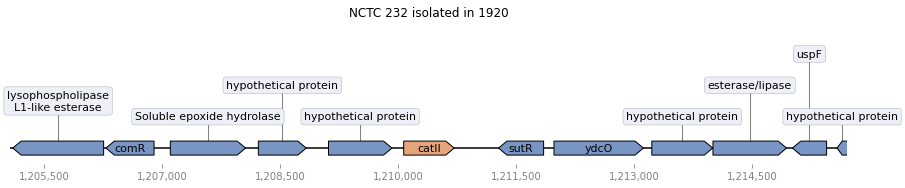

In [7]:
class MyCustomTranslator(BiopythonTranslator):
    def compute_feature_color(self, feature):
        if "gene" in feature.qualifiers:
            if "cmlA" in feature.qualifiers["gene"][0]:
                return "#E6A47D"
        if feature.type == "CDS":
            return sns.color_palette('deep')[0]
        elif feature.type == "repeat_region":
            return sns.color_palette("deep")[1]
        elif feature.type == "mobile_element":
            return sns.color_palette("deep")[3]
        else:
            return sns.color_palette("deep")[2]

    def compute_feature_label(self, feature):
        if feature.type == "restriction_site":
            return None
        if "gene" in feature.qualifiers:
            if "cmlA" in feature.qualifiers["gene"][0]:
                return "catII"
            if "_" in feature.qualifiers["gene"][0]:
                return feature.qualifiers["gene"][0].split("_")[0]
        else:
            prodName = feature.qualifiers["product"][0]
            # print(prodName)
            if "cmlA" in feature.qualifiers["product"][0]:
                return "catII"
            if "thylakoid" in feature.qualifiers["product"][0]:
                return "btpA"
            if "NCBIFAM" in prodName or "NCBI Protein Cluster" in prodName:
                # print(prodName)
                try:
                    NewprodName = prodName.split(": ")[1]
                    return NewprodName
                except:
                    return prodName
            # print(feature.qualifiers)
        return BiopythonTranslator.compute_feature_label(self, feature)

    def compute_filtered_features(self, features):
        null_list = ["source", "gene"]
        passing = []
        for feature in features:
            if feature.type in null_list:
                continue
            else:
                passing.append(feature)
        return passing


record_dict = SeqIO.to_dict(
    SeqIO.parse(
        "/home/ak586/baym/projects/project_microtrawler/data/2_analyze-seqs/NCTC/ena/NCTC232/assembly/assembly_prokka/assembly_prokka.gbk",
        "genbank",
    )
)
print(record_dict)
record = record_dict["UGQG01000001.1"]
# 1410370..1411185
# 299166.0 	300149.0
graphic_record = MyCustomTranslator().translate_record(record)
cgraphic_record = graphic_record.crop((1210069 - 5000, 1210710 + 5000))
ax, _ = cgraphic_record.plot(
    figure_width=15, with_ruler=True, strand_in_label_threshold=7
)
plt.title("NCTC 232 isolated in 1920")
ax.figure.savefig("./figs/fig3/NCTC232-catII-neigh.png", bbox_inches="tight", dpi=200)